# Euler's Method:

We want to build an ODE solver that allows us to specify an IVP, and then outputs a table and graph of the DE.

 - $y_{n+1} = y_n + dx*y'(x_n, y_n)$

Test Example:

 - $ y'(x) = y-x^2+1$

 - $y(0) = 0.5$

,n,x_n,y_n,y_p,y_n+1
0,0.0,0.0000,0.500000,1.500000,0.500750
1,1.0,0.0005,0.500750,1.500750,0.501500
2,2.0,0.0010,0.501500,1.501499,0.502251
3,3.0,0.0015,0.502251,1.502249,0.503002
4,4.0,0.0020,0.503002,1.502998,0.503754
...,...,...,...,...,...
9995,9995.0,4.9975,-38.032326,-62.007332,-38.063329
9996,9996.0,4.9980,-38.063329,-62.043333,-38.094351
9997,9997.0,4.9985,-38.094351,-62.079353,-38.125391
9998,9998.0,4.9990,-38.125391,-62.115392,-38.156448


Text(0.5, 1.0, 'ODE Plot, dx = 0.0005')

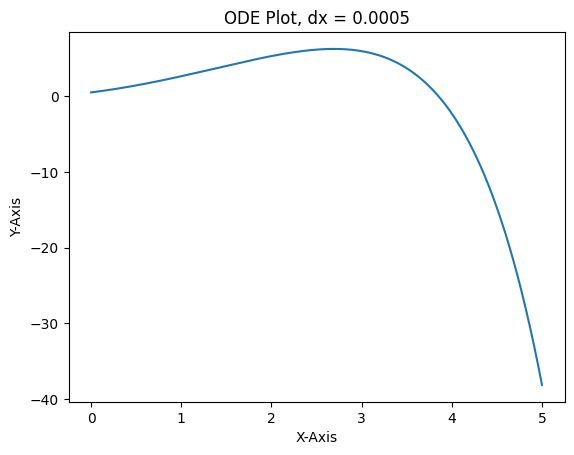

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# initial values
x0 = 0
y0 = 0.5
n = 10000 # granularity
lastX = 5 # ending x value


# get y prime evaluated at x and y 
def YP(x,y):
    return float(y-x**2+1) # for students: THIS IS WHERE YOU PUT THE DE (inside of float)

# get the next y value based on current x and y
def new_y(x,y,h):
    return y + h*YP(x,y) # this is Euler's formula for approximating y(x)

# get dx for intended last y value
def get_dx(granularity, endval, startval):
    return (+endval-startval)/granularity # this calculates dx for the size of the interval and number of partitions

# initialize dataframe
cols = ['n', 'x_n', 'y_n', 'y_p', 'y_n+1'] # set the column names for the table
ode = pd.DataFrame(columns=cols) # initialize the table

# define dx and put the first row of the table into the ODE dataframe
dx = get_dx(n,lastX,x0) # get dx for calculating new y values
ode.loc[0] = [0, x0, y0, YP(x0,y0), new_y(x0,y0,h)] # set first row w/ initial conditions

# fill out the table
for i in range(1,n): # loop from 1 to n
    ode.loc[i,'n'] = i # fill the n column from 1 to n
    ode.loc[i,'x_n'] = ode.loc[i-1,'x_n'] + dx # fill the x_n column by repeatedly adding dx
    ode.loc[i,'y_n'] = ode.loc[i-1,'y_n+1'] # fill the y_n column with the previous y_n+1 entry
    ode.loc[i,'y_p'] = YP(ode.loc[i,'x_n'],ode.loc[i,'y_n']) # fill the y prime column with y' calculations
    ode.loc[i,'y_n+1'] = new_y(ode.loc[i,'x_n'],ode.loc[i,'y_n'], dx) # fill the y_n+1 column with Euler's formula

# display the table
display(ode)

# plot the figure
plt.figure # tell the computer that you are making a figure
plt.plot(ode['x_n'],ode['y_n']) # tell the computer what to plot
plt.xlabel('X-Axis') # label the x-axis
plt.ylabel('Y-Axis') # label the y-axis
plt.title(f'ODE Plot, dx = {dx}') # give the plot a title

# Monte-Carlo Simulation:

Algorithm:
 - Sample randomly according to a uniform distribution in $[a,b]$.
 
 - Generate $dx$ list.

 - Use Euler's method, but don't use $n*h$, use $dx_i$ from the $dx$ list.

,n,x_n,y_n,y_p,y_n+1
0,0.0,0.000000,0.500000,1.500000,0.500131
1,1.0,0.000196,0.500131,1.500131,0.500426
2,2.0,0.000780,0.500426,1.500425,0.501301
3,3.0,0.001494,0.501301,1.501299,0.502374
4,4.0,0.003084,0.502374,1.502364,0.504762
...,...,...,...,...,...
9994,9994.0,9.995006,-10852.494734,-10951.394882,-10856.284258
9995,9995.0,9.995951,-10856.284258,-10955.203291,-10866.633716
9996,9996.0,9.995997,-10866.633716,-10965.553677,-10867.142471
9997,9997.0,9.996077,-10867.142471,-10966.064029,-10868.018655


Text(0.5, 1.0, 'ODE Plot, Granularity = 10000 Samples')

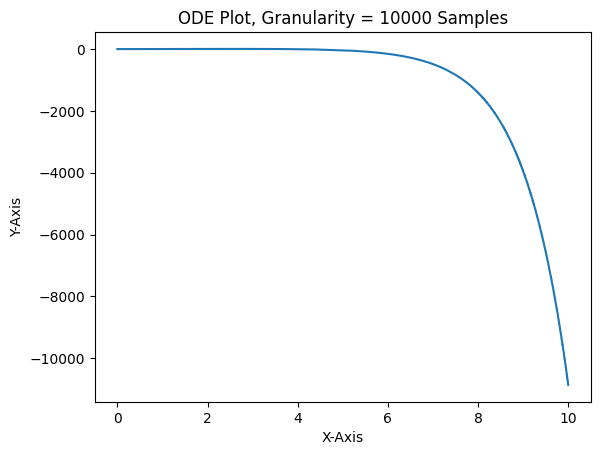

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd

#initial values
x0 = 0
y0 = 0.5
n = 10000 #granularity
lastX = 10 #ending x value

# get y prime evaluated at x and y
def YP(x,y):
    return float(y-x**2+1) # students: put the DE here in the float()

# get the next y value based on current x and y
def new_y(x,y,h):
    return y + h*YP(x,y) # this is Euler's formula for approximating y(x)

# initialize dataframe
cols = ['n', 'x_n', 'y_n', 'y_p', 'y_n+1'] # initialize column titles
ode = pd.DataFrame(columns=cols) # initialize dataframe

# get n for intended last y value

def get_dx(granularity, endval, startval):
    # get our random sample list, in order.
    xsample = [] # start with an empty list
    for i in range(granularity): # get n-many samples
        xsample += [rd.uniform(startval,endval)] # add the newest random sample to the list
    xsample.sort() # sort the list of samples from least to greatest

    # get the dx list
    dx = [] # start with an empty list
    for i in range(len(xsample)-1): # get our dx values
        dx += [xsample[i+1]-xsample[i]] # difference the points on the x-axis

    return dx # return the output

#define dx
dx = get_dx(n,lastX,x0) # get the dx list from the function
ode.loc[0] = [0, x0, y0, YP(x0,y0), new_y(x0,y0,dx[0])] #initialize the first row of data

#fill out the table
for i in range(1,len(dx)): # loop from 1 to n
    ode.loc[i,'n'] = i # fill the n column from 1 to n
    ode.loc[i,'x_n'] = ode.loc[i-1,'x_n'] + dx[i] # fill the x_n column by repeatedly adding dx
    ode.loc[i,'y_n'] = ode.loc[i-1,'y_n+1'] # fill the y_n column with the previous y_n+1 entry
    ode.loc[i,'y_p'] = YP(ode.loc[i,'x_n'],ode.loc[i,'y_n']) # fill the y prime column with y' calculations
    ode.loc[i,'y_n+1'] = new_y(ode.loc[i,'x_n'],ode.loc[i,'y_n'], dx[i]) # fill the y_n+1 column with Euler's formula

#display the table
display(ode) 

#plot the figure
plt.figure
plt.plot(ode['x_n'],ode['y_n'])
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title(f'ODE Plot, Granularity = {n} Samples')